# EDA

In [25]:
import numpy as np
import scipy 
import seaborn as sns
import pandas as pd
import patsy
import matplotlib
import matplotlib.pyplot as plt
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests
import random
import sys
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fivethirtyeight')
from IPython.display import display
from bs4 import BeautifulSoup

from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import cross_val_score, train_test_split

from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# import clean data

users_clean_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_users_en_oct5.csv')
revs_clean_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_revs_en_oct5.csv')
hostels_clean_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_hostels2_oct4.csv')

## EDA Revs DF
- What countries recieve the most reviews 
- What countries recieve the highest review scores
- What months have the most reviews
- What months have the highest mean scores
- Hist of Review Scores


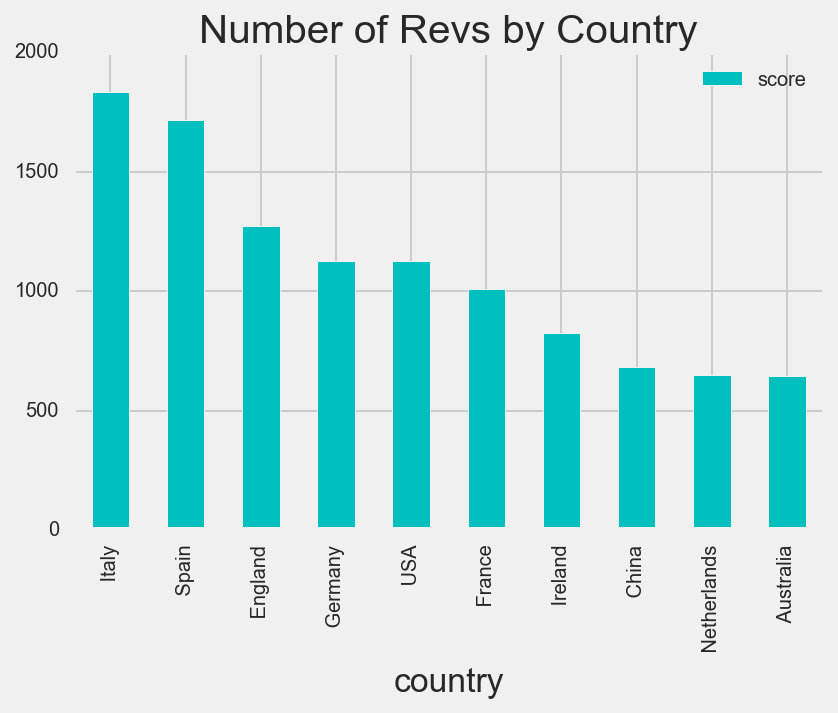

In [27]:
# Bar Graph of rev counts by country 

revs_clean_df.groupby(['country'])[['score']].count().sort_values('score', ascending = False).head(10).plot(
    kind='bar', color = 'c',title = 'Number of Revs by Country')

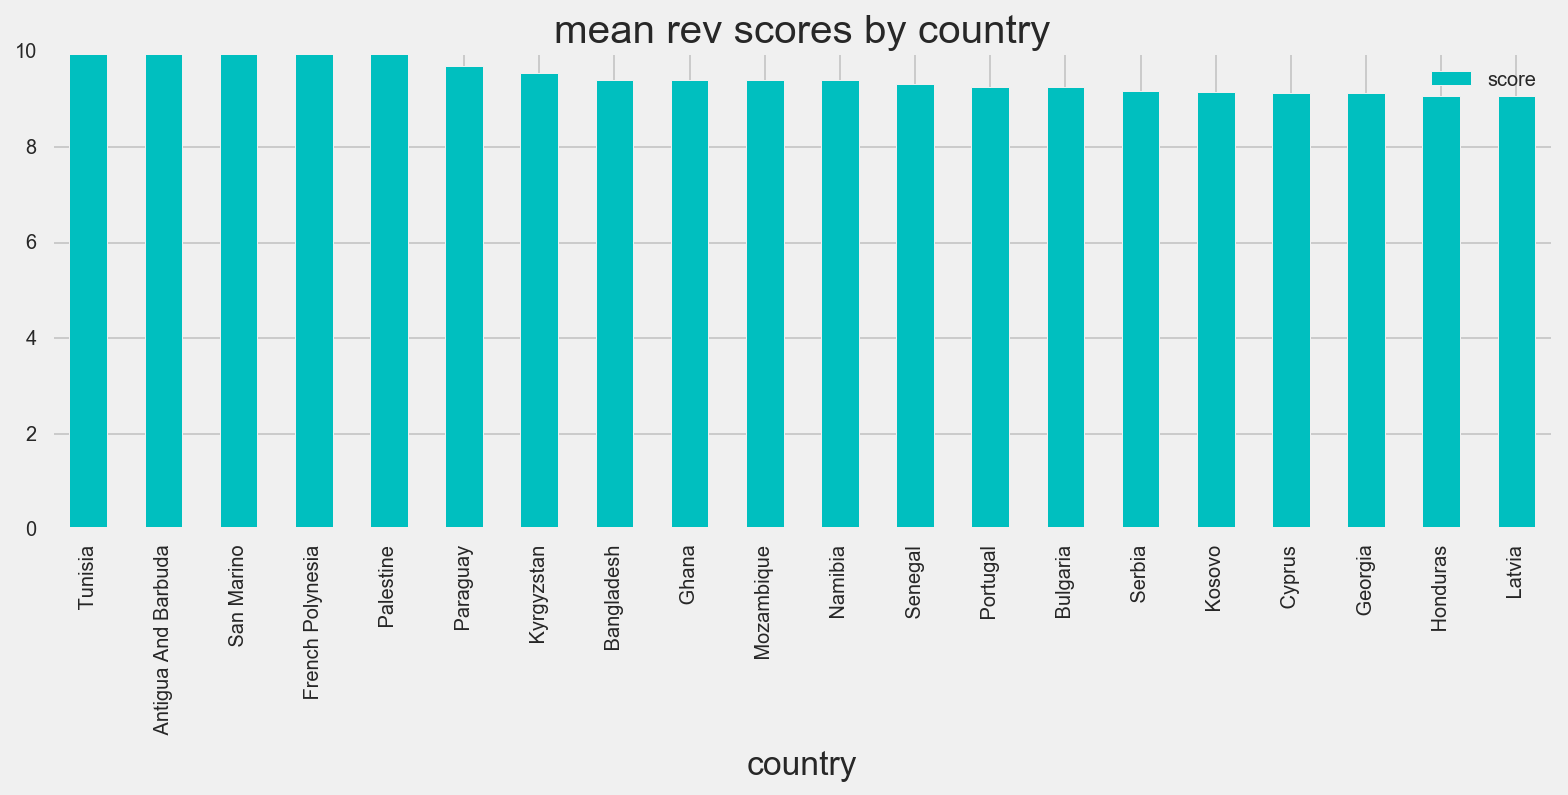

In [28]:
# Bar Graph of mean rev scores by country 

revs_clean_df.groupby(['country'])[['score']].mean().sort_values('score', ascending = False).head(20).plot(
    kind='bar', title = 'mean rev scores by country', color = 'c', figsize = (12,4))

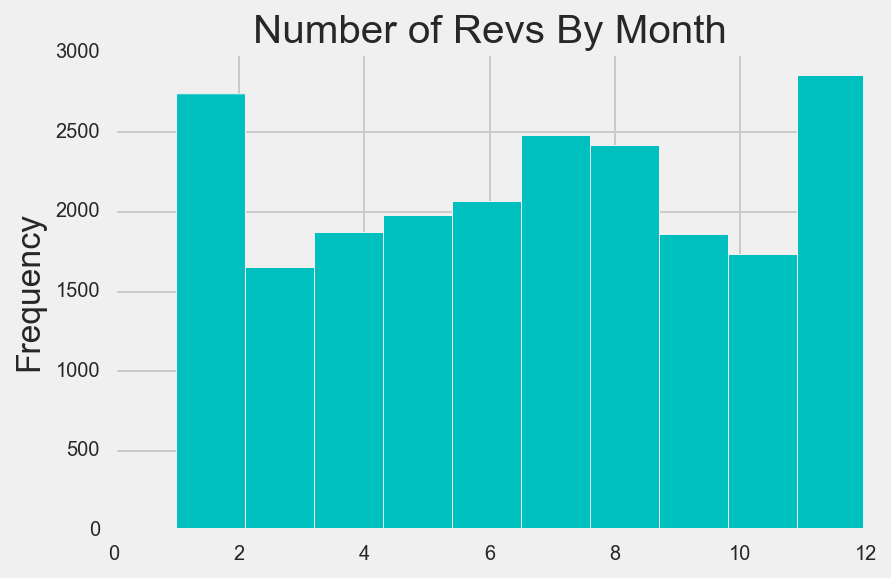

In [29]:
# Hist of Number of reviews by Month 

revs_clean_df['month'].plot( kind = 'hist', color = 'c',title = 'Number of Revs By Month')

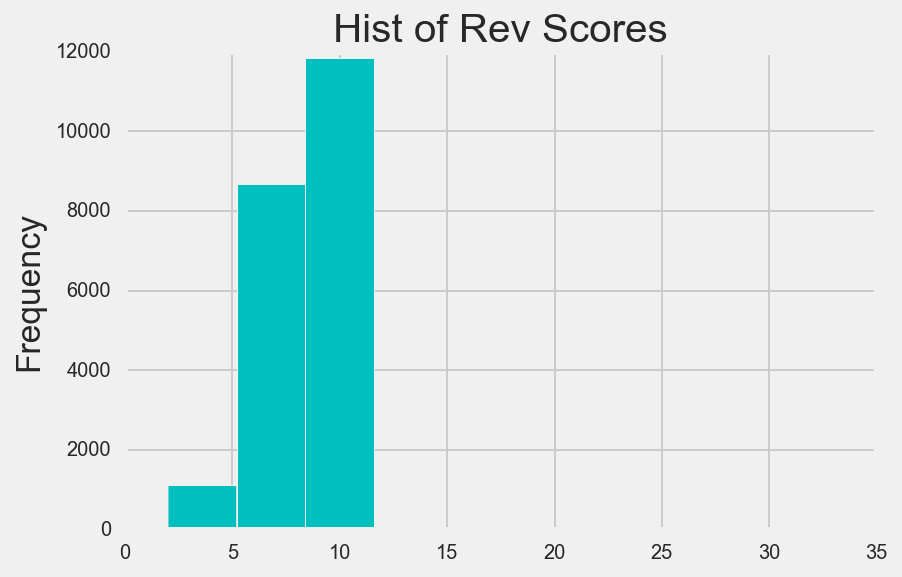

In [30]:
revs_clean_df['score'].plot(kind = 'hist', color = 'c', bins =10, title = 'Hist of Rev Scores')

## EDA Users DF
- Where are most users from
- Which users leave the most reviews
- What kinds of travel groups are most users in
- What age groups are most users in 

In [31]:
users_clean_df.head(2)

,Unnamed: 0,Unnamed: 0.1,user_id,num_revs,nationality,group,age
0,0,101,1189474,2,England,NaN,not specified
1,1,102,1595059,2,Hong Kong,NaN,not specified


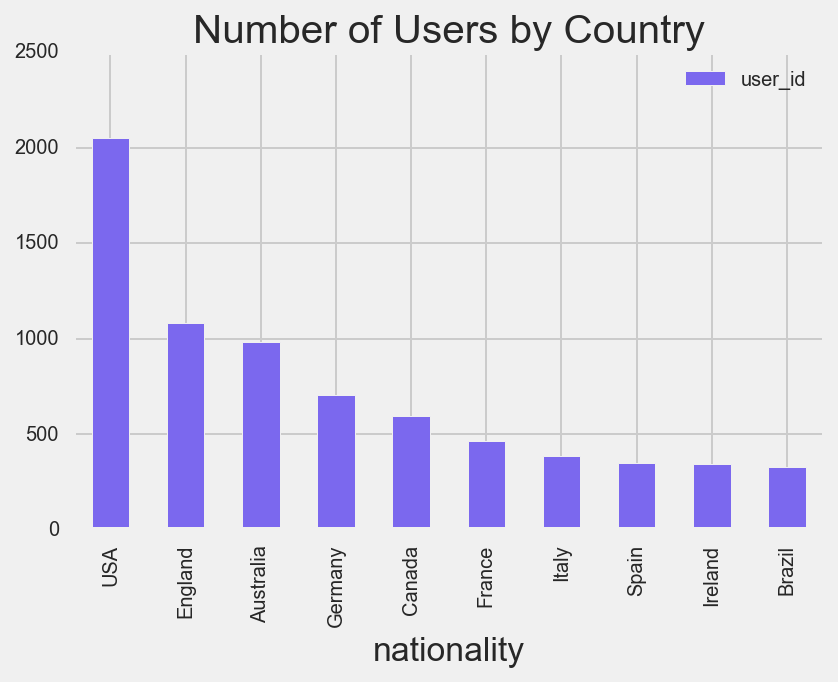

In [33]:
# Bar Graph of Users by Country

users_clean_df.groupby(['nationality'])[['user_id']].count().sort_values('user_id', ascending = False).head(10).plot(
    kind='bar',title = 'Number of Users by Country', color = 'mediumslateblue')

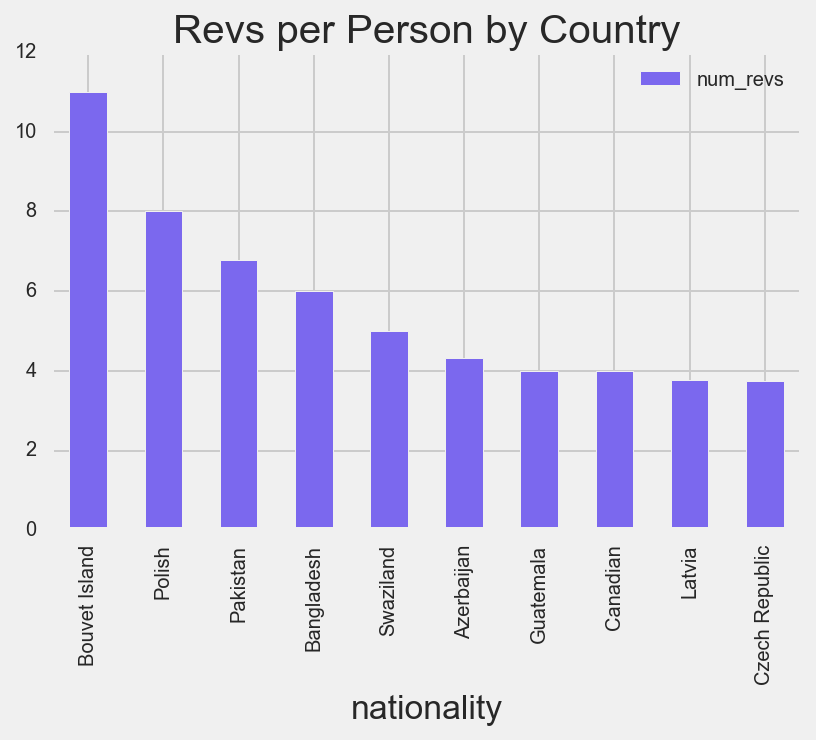

In [34]:
# Revs per person by country

users_clean_df.groupby(['nationality'])[['num_revs']].mean().sort_values('num_revs', ascending = False).head(10).plot(
    kind='bar', title = 'Revs per Person by Country', color = 'mediumslateblue')

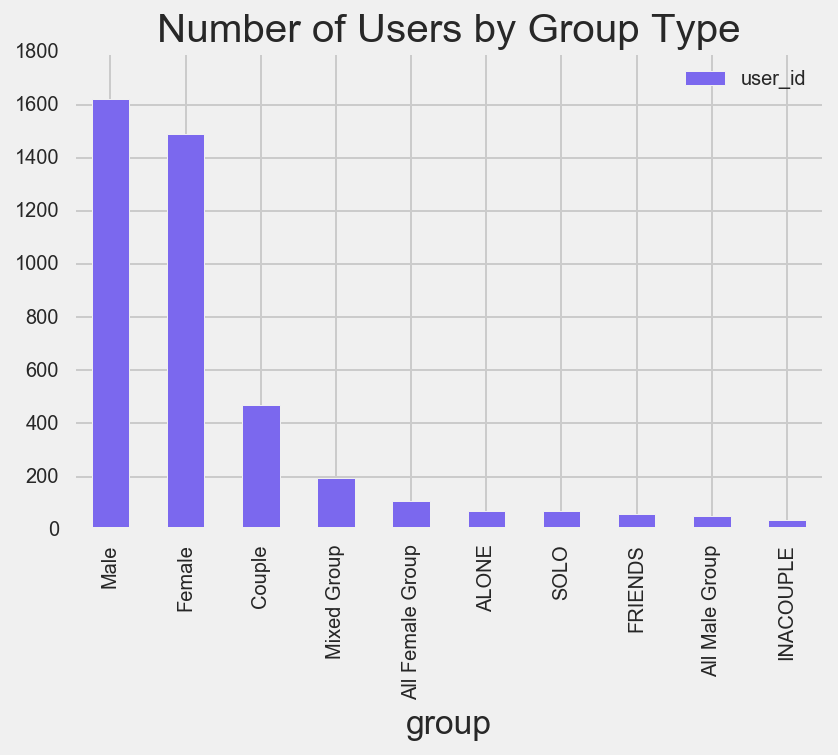

In [35]:
# Bar Graph of Users by Group type

users_clean_df.groupby(['group'])[['user_id']].count().sort_values('user_id', ascending = False).head(10).plot(
    kind='bar',title = 'Number of Users by Group Type', color = 'mediumslateblue')

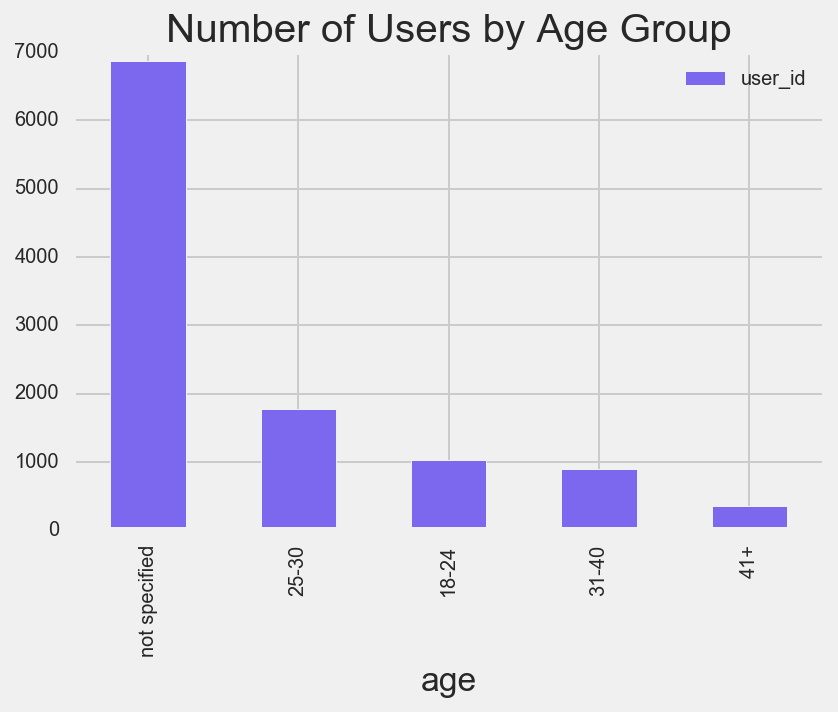

In [36]:
# Bar Graph of Users by Age Group

users_clean_df.groupby(['age'])[['user_id']].count().sort_values('user_id', ascending = False).head(10).plot(
    kind='bar',title = 'Number of Users by Age Group', color = 'mediumslateblue')

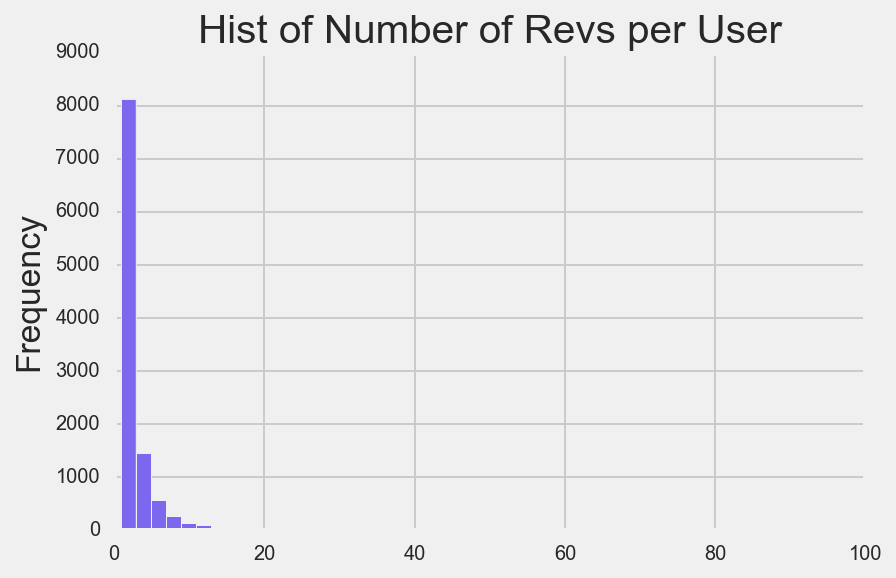

In [37]:
users_clean_df['num_revs'].plot(kind = 'hist', bins = 50,
                                title = 'Hist of Number of Revs per User', color = 'mediumslateblue')

In [38]:
# users by country DF
nat_count = pd.DataFrame(users_clean_df.groupby(['nationality'])[['user_id']].count().sort_values('user_id', ascending = False))
nat_count = nat_count.reset_index()
nat_count.head()

,nationality,user_id
0,USA,2051
1,England,1081
2,Australia,984
3,Germany,707
4,Canada,598


In [8]:
# save users by country to csv

nat_count.to_csv(path_or_buf='/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/raw-data/nat_count.csv')

## EDA Hostels DF
- Hist of hostel scores
- What countries are most hostels in
- What countries have the highest avg hostel scores

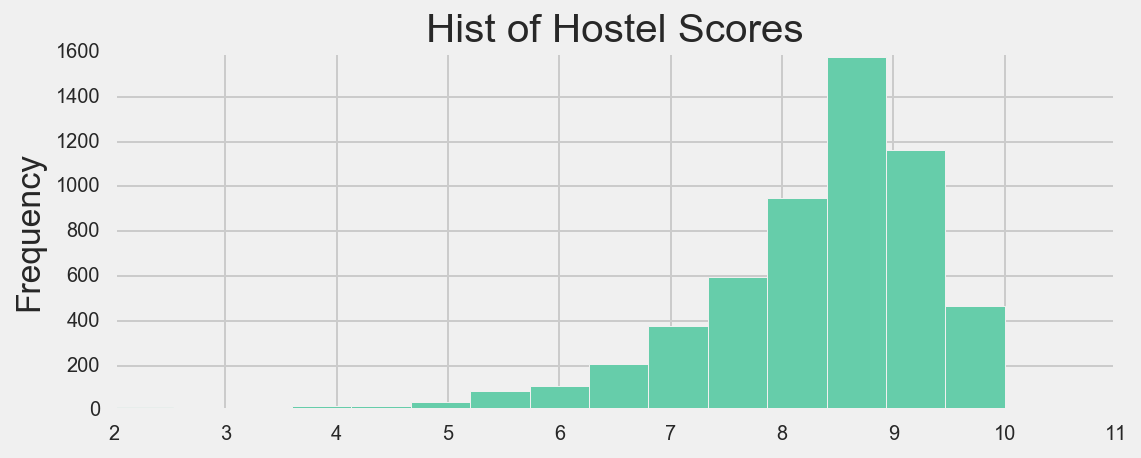

In [39]:
hostels_clean_df.rating.plot(kind = 'hist',bins=15,color = "mediumaquamarine", title = 'Hist of Hostel Scores',figsize=(8,3))

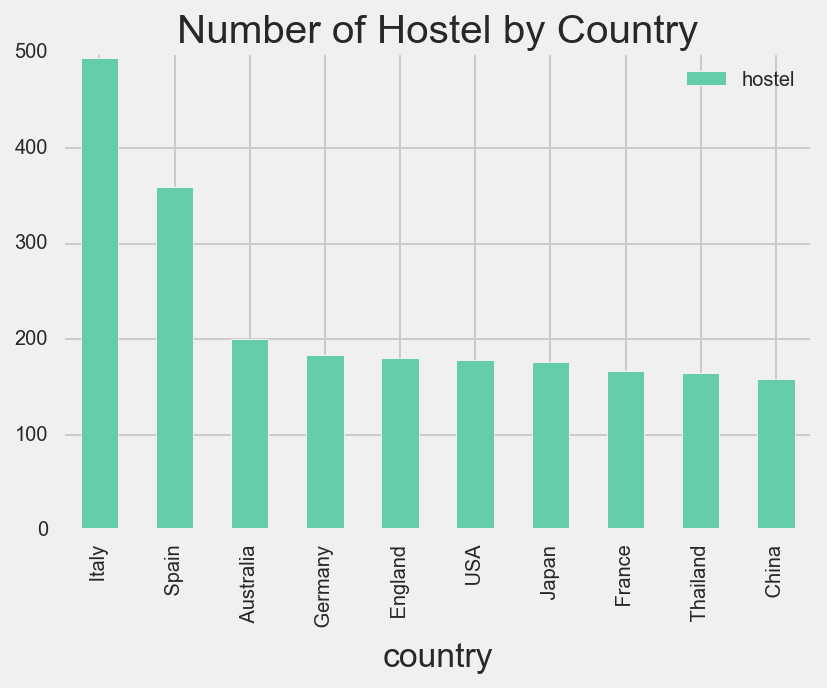

In [40]:
hostels_clean_df.groupby(['country'])[['hostel']].count().sort_values('hostel',ascending = False).head(10).plot(
    kind = 'bar', title = 'Number of Hostel by Country', color ="mediumaquamarine" )

In [7]:
host_country = hostels_clean_df.groupby(['country'])[['hostel']].count()

In [8]:
# save users by country to csv

host_country.to_csv(path_or_buf='/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/raw-data/hst_count.csv')